In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/home/two-asus/Documents/cloudcomputing/project/ML/data/predictive_maintenance.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.dropna(inplace=True)

In [5]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [6]:
labelEncode = LabelEncoder()

In [7]:
X = df.drop(['UDI','Product ID', 'Type', 'Target', 'Failure Type'], axis=1)  # Features
y = df['Target']  # Target variable

In [8]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [9]:
# X['Product ID'] = labelEncode.fit_transform(df['Product ID'])
X['Type'] = labelEncode.fit_transform(df['Type'])
# df['Failure Type Encoded'] = labelEncode.fit_transform(df['Failure Type'])

In [10]:
encoded_data = X[['Type']]

In [11]:
encoded_data

,Type
0,2
1,1
2,1
3,1
4,1
...,...
9995,2
9996,0
9997,2
9998,0


In [12]:
X = pd.concat([X], axis=1)
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
0,298.1,308.6,1551,42.8,0,2
1,298.2,308.7,1408,46.3,3,1
2,298.1,308.5,1498,49.4,5,1
3,298.2,308.6,1433,39.5,7,1
4,298.2,308.7,1408,40.0,9,1
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,2
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,2
9998,299.0,308.7,1408,48.5,25,0


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RobustScaler to scale the features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [16]:
batch_size = 64

train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [17]:
# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize the hidden state with zeros
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        # Forward pass through the RNN layer
        out, _ = self.rnn(x, h0)
        # Apply the fully connected layer to the last output of the RNN sequence
        out = self.fc(out[:, -1, :])
        return out

In [18]:

# Set hyperparameters
input_size = X_train.shape[1]
hidden_size = 32
output_size = len(np.unique(y_train))
print(X_train.shape[1])

6


In [19]:
# Instantiate the model, loss function, and optimizer
model = RNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # You can adjust lr and momentum as needed

In [20]:
# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

RNN(
  (rnn): RNN(6, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=2, bias=True)
)

In [21]:
# # Training the model
# num_epochs = 10
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.to(device)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}')


In [22]:
# # Evaluate the model
# model.eval()
# correct = 0
# total = 0
# with torch.no_grad():
#     for inputs, labels in test_loader:
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# accuracy = correct / total
# print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Epoch 1/10, Train Loss: 0.3730, Train Acc: 0.9061, Eval Loss: 0.1584, Eval Acc: 0.9695
Epoch 2/10, Train Loss: 0.1390, Train Acc: 0.9653, Eval Loss: 0.1184, Eval Acc: 0.9695
Epoch 3/10, Train Loss: 0.1199, Train Acc: 0.9656, Eval Loss: 0.1077, Eval Acc: 0.9695
Epoch 4/10, Train Loss: 0.1102, Train Acc: 0.9664, Eval Loss: 0.0993, Eval Acc: 0.9710
Epoch 5/10, Train Loss: 0.1027, Train Acc: 0.9673, Eval Loss: 0.0931, Eval Acc: 0.9710
Epoch 6/10, Train Loss: 0.0978, Train Acc: 0.9674, Eval Loss: 0.0895, Eval Acc: 0.9730
Epoch 7/10, Train Loss: 0.0946, Train Acc: 0.9691, Eval Loss: 0.0865, Eval Acc: 0.9735
Epoch 8/10, Train Loss: 0.0928, Train Acc: 0.9705, Eval Loss: 0.0845, Eval Acc: 0.9735
Epoch 9/10, Train Loss: 0.0920, Train Acc: 0.9699, Eval Loss: 0.0832, Eval Acc: 0.9735
Epoch 10/10, Train Loss: 0.0910, Train Acc: 0.9700, Eval Loss: 0.0841, Eval Acc: 0.9730


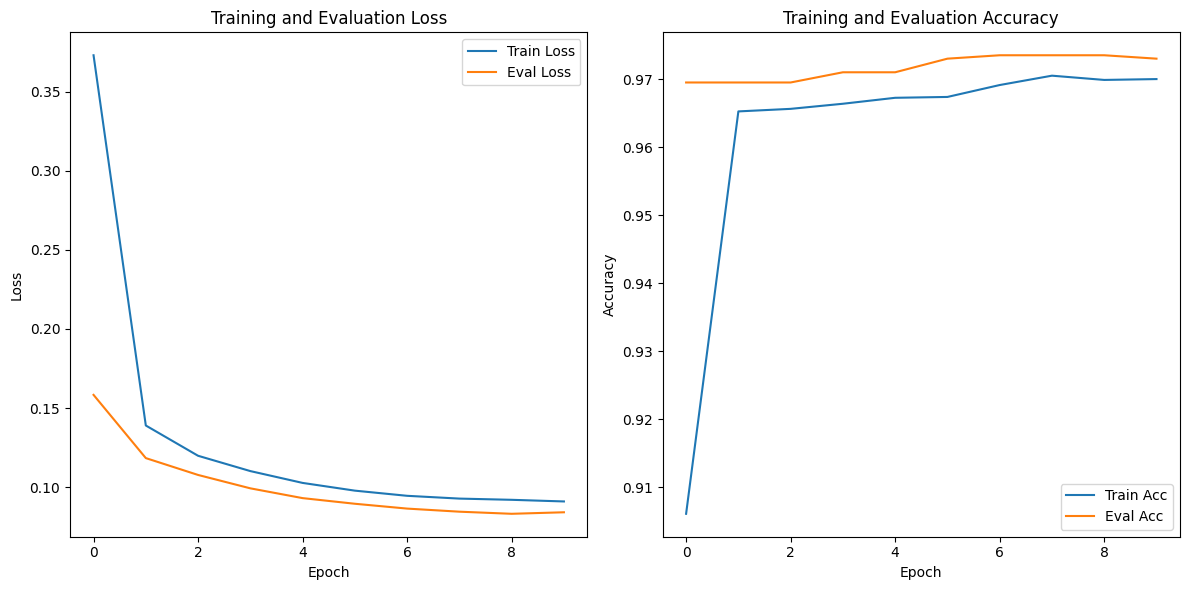

In [23]:
# Training the model
num_epochs = 10
train_losses = []
train_accuracies = []
eval_losses = []
eval_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        # Ensure that the input tensor has the correct shape
        inputs = inputs.unsqueeze(1)  # Add an extra dimension for the batch (batch_size, seq_len, input_size)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    eval_loss = 0.0
    predictions = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = inputs.unsqueeze(1)  # Add an extra dimension for the batch (batch_size, seq_len, input_size)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            eval_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predictions.extend(predicted.cpu().numpy())
            
    eval_loss /= len(test_loader)
    eval_accuracy = correct / total
    eval_losses.append(eval_loss)
    eval_accuracies.append(eval_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Eval Loss: {eval_loss:.4f}, Eval Acc: {eval_accuracy:.4f}')

# Save the model
torch.save(model.state_dict(), 'rnn_model.pth')


# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(eval_losses, label='Eval Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(eval_accuracies, label='Eval Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Evaluation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

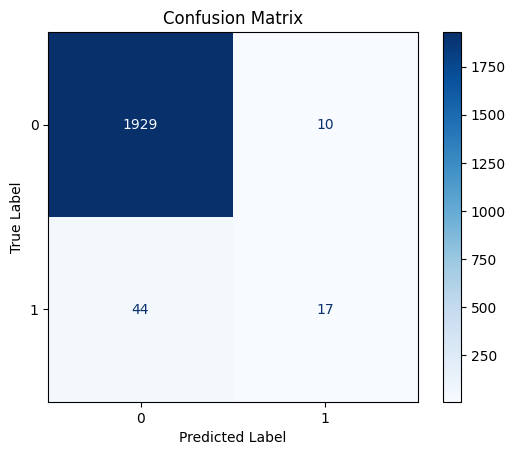

In [24]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
class_names = np.unique(y_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
# sns.set(font_scale=1.2)
ConfusionMatrixDisplay(conf_matrix, display_labels=class_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()